In [2]:
import pandas as pd
import string as str
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error,r2_score,confusion_matrix,accuracy_score,ConfusionMatrixDisplay,precision_score,f1_score,recall_score
import seaborn as sns
from imblearn.over_sampling import SMOTE


In [3]:
#Reading the data
df=pd.read_csv(r"C:\Users\Lakshin Khurana\Downloads\patients_data.csv")

In [4]:
#Data Cleaning
df=df.dropna()

In [5]:
#Showing the columns
df.columns

Index(['PatientID', 'State', 'Sex', 'GeneralHealth', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'HadHeartAttack',
       'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory',
       'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
       'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [6]:
#Initialising the model , creating smote & label encoder object for undersampling and label encoding strings
log_reg_model= LogisticRegression(solver='saga' , max_iter=500000, class_weight="balanced")
label_encoder=LabelEncoder()
smote = SMOTE(sampling_strategy='auto', random_state=42)


In [7]:
# Make a copy of X to avoid SettingWithCopyWarning
X = df[[ 'Sex', 'GeneralHealth', 'AgeCategory','WeightInKilograms', 'BMI', 'HadHeartAttack', 'HadAsthma', 'HadKidneyDisease', 'DifficultyWalking', 'SmokerStatus','ECigaretteUsage','AlcoholDrinkers', 'HIVTesting']].copy()

# Apply label encoding to each categorical column
label_encoder = LabelEncoder()
for column in [ 'Sex', 'GeneralHealth', 'AgeCategory','HadHeartAttack', 'HadAsthma', 'HadKidneyDisease', 'DifficultyWalking', 'SmokerStatus','ECigaretteUsage','AlcoholDrinkers', 'HIVTesting']:
    X[column] = label_encoder.fit_transform(X[column])

# Check the encoded data
print(X.head())
Y=df['HighRiskLastYear']


   Sex  GeneralHealth  AgeCategory  WeightInKilograms        BMI  \
0    0              1           11          84.820000  32.099998   
1    0              4            9          71.669998  27.990000   
2    1              0            8          71.209999  22.530001   
3    1              4           10          95.250000  30.129999   
4    0              2            6          78.019997  27.760000   

   HadHeartAttack  HadAsthma  HadKidneyDisease  DifficultyWalking  \
0               0          1                 0                  1   
1               0          0                 0                  0   
2               0          0                 0                  0   
3               0          0                 0                  0   
4               0          0                 0                  0   

   SmokerStatus  ECigaretteUsage  AlcoholDrinkers  HIVTesting  
0             2                0                0           0  
1             2                0                

In [8]:
Y=Y.astype(int)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
#Resampling the Data
X_resampled, Y_resampled = smote.fit_resample(X_train, Y_train)

In [9]:
log_reg_model.fit(X_resampled,Y_resampled)

LogisticRegression(class_weight='balanced', max_iter=500000, solver='saga')

In [10]:
print(X.shape)
print(Y.shape)

(237630, 13)
(237630,)


In [11]:
Y_pred_log=log_reg_model.predict(X_test)

In [12]:
mse_log=mean_squared_error(Y_test,Y_pred_log)

In [13]:
print("Mean Squared Error: ",mse_log)

Mean Squared Error:  0.2789350390663356


In [20]:
X_single_feature=X.iloc[:,0]
Y_pred_line_log=log_reg_model.predict(X)
X_line = np.linspace(X_single_feature.min(), X_single_feature.max(), 237630).reshape(-1, 1)

In [21]:
conf_matrix_log = confusion_matrix(Y_test, Y_pred_log)

The Logistic Regression Model is 72.106% accurate


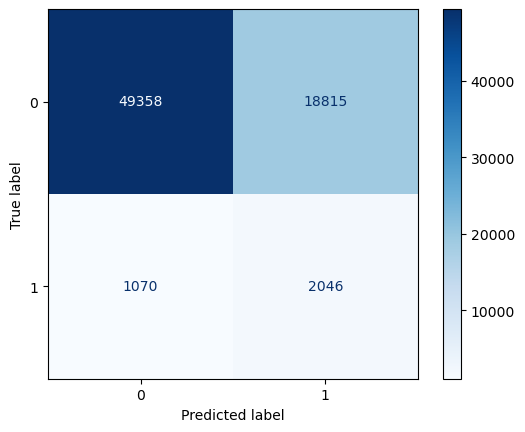

In [22]:
acc_log=accuracy_score(Y_test,Y_pred_log)
acc_percent_log=acc_log*100
print(f"The Logistic Regression Model is {acc_percent_log:.3f}% accurate")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_log)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
#Now we will be using the KNN Model classification algorithm to see if it is a better fit for our dataset

In [17]:
knn_model=KNeighborsClassifier()

In [18]:
knn_model.fit(X_resampled,Y_resampled)

KNeighborsClassifier()

In [19]:
Y_pred_knn=knn_model.predict(X_test)

In [20]:
percent_knn=accuracy_score(Y_pred_knn,Y_test)*100


In [21]:
conf_matrix_knn=confusion_matrix(Y_test,Y_pred_knn)

The KNN Model is 80.864% accurate


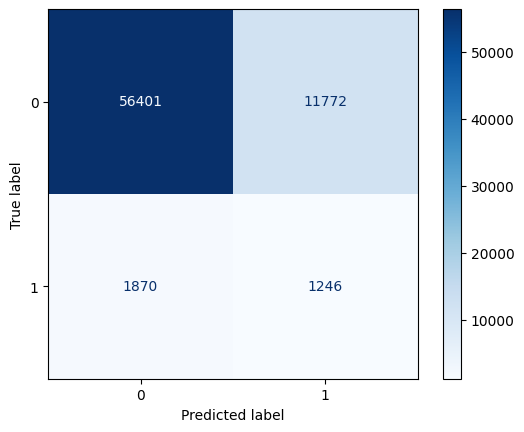

In [22]:
ConfusionMatrixDisplay(conf_matrix_knn).plot(cmap=plt.cm.Blues)
print(f"The KNN Model is {percent_knn:0.3f}% accurate")

In [23]:
#Now we will try Random Forest Model for the same dataset

In [24]:
random_forest_model=RandomForestClassifier()

In [25]:
random_forest_model.fit(X_resampled,Y_resampled)

RandomForestClassifier()

In [26]:
Y_pred_rand=random_forest_model.predict(X_test)

In [27]:
conf_matrix_rand=confusion_matrix(Y_test,Y_pred_rand)
percent_rand=accuracy_score(Y_test,Y_pred_rand)*100

The accuracy of Random Tree Forest Classifier is 89.373%


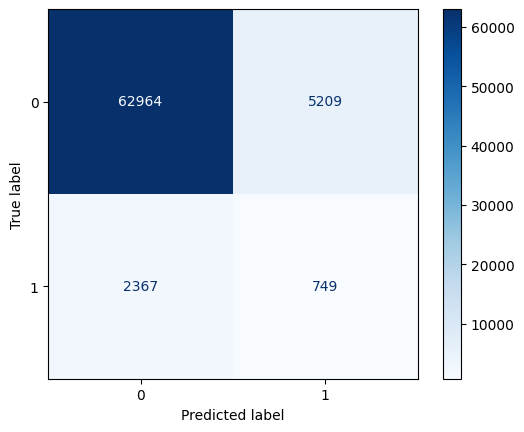

In [28]:
ConfusionMatrixDisplay(conf_matrix_rand).plot(cmap=plt.cm.Blues)
print(f"The accuracy of Random Tree Forest Classifier is {percent_rand:.3f}%")

In [37]:
risk_score=random_forest_model.predict_proba(X)[:,1]
risk_scores_percentage = np.array([f"{score * 100:.2f}%" for score in risk_score])
risk_df=pd.DataFrame(risk_scores_percentage)

During this project , I noticed that before undersampling even though the model was highly accurate , it was only because the data was heavily imbalanced and it barely predicted a true case and hence when the data was resampled the accuracy decreased from 96% to 89% but it resulted in much better risk percentage predictions which was observed in the Power BI Dashboard and hence the project was a huge learning experience about which model suits which types of datasets